In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("manhattan.csv")
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [4]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
 
y = df[['rent']]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [6]:
print(x_train.shape)
print(x_test.shape)
 
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
mlr = LinearRegression()

In [9]:
mlr.fit(x_train, y_train)

LinearRegression()

In [10]:
y_predict = mlr.predict(x_test)

In [11]:
# Sonny doesn't have an elevator so the 11th item in the list is a 0
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

In [12]:
predict = mlr.predict(sonny_apartment)
 
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


And Sonny is only paying $2,000. Yay!

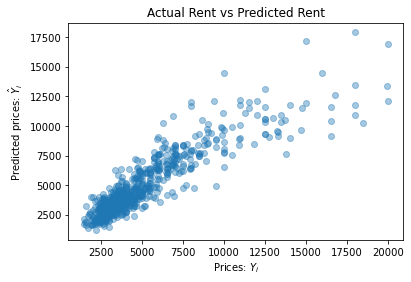

In [16]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

In [17]:
print(mlr.coef_)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -302.73 will impact the rent more than a coefficient of 1199.38, with the former impacting prices negatively and latter positively.

In [ ]:
# In our Manhattan model, we used 14 variables, so there are 14 coefficients:
'''
bedrooms - number of bedrooms
bathrooms - number of bathrooms
size_sqft - size in square feet
min_to_subway - distance from subway station in minutes
floor - floor number
building_age_yrs - building’s age in years
no_fee - has no broker fee (0 for fee, 1 for no fee)
has_roofdeck - has roof deck (0 for no, 1 for yes)
has_washer_dryer - has in-unit washer/dryer (0/1)
has_doorman - has doorman (0/1)
has_elevator - has elevator (0/1)
has_dishwasher - has dishwasher (0/1)
has_patio - has patio (0/1)
has_gym - has gym (0/1)
'''

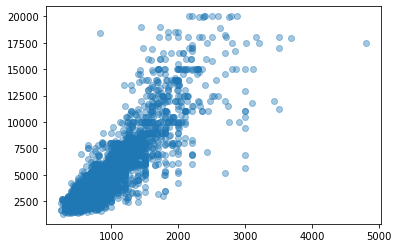

In [19]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)

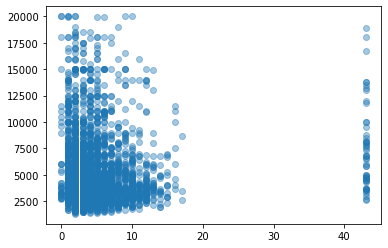

In [20]:
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)

In [21]:
print("Train score:")
print(mlr.score(x_train, y_train))

Train score:
0.7725460559817883


In [22]:
print("Test score:")
print(mlr.score(x_test, y_test))

Test score:
0.8050371975357653
